## BIG DATA AND MACHINE LEARNING: TOOLS FOR MAINTENANCE MANAGEMENT

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### READ ERP DATA FILE

In [2]:
ERP_data=pd.read_csv("ERP_Dataset.csv")
ERP_data.head(2)

,Dates,Part_01,Part_03,Part_05,Part_06,Part_10,Part_12
0,2016-06-01,77.0,23.0,56.0,49.0,111.0,59.0
1,2016-07-01,144.0,40.0,66.0,79.0,167.0,123.0


Text(0.5, 1.0, 'Part 10, Part 12')

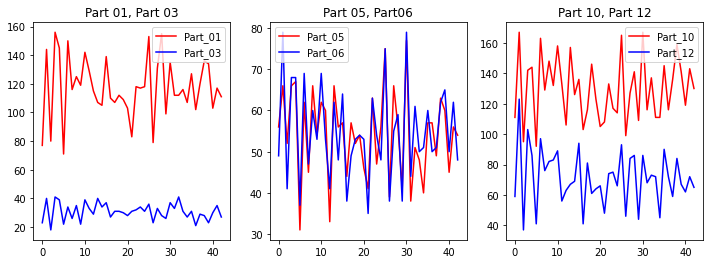

In [3]:
Parts = list(ERP_data.columns)
ERP_data.reset_index()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ERP_data.plot(y =Parts[1:3], ax=axes[0], color=['red', 'blue']); axes[0].set_title('Part 01, Part 03')
ERP_data.plot(y =Parts[3:5], ax=axes[1], color=['red', 'blue']); axes[1].set_title('Part 05, Part06')
ERP_data.plot(y =Parts[5:7], ax=axes[2], color=['red', 'blue']); axes[2].set_title('Part 10, Part 12')

### READ MERGE DATA MTBF

In [4]:
MTBF_Data=pd.read_csv("MTBF_Dataset.csv")
m_columns = ['Dates', 'Equipment'] + list(MTBF_Data.columns)[2:]
MTBF_Data = MTBF_Data.reindex(columns = m_columns)
MTBF_Data.head(2)

,Dates,Equipment,Work Shift,Part_01,Part_03,Part_05,Part_06,Part_10,Part_12
0,2019-01-05,3,False,16.0,4.0,4.0,6.0,16.0,10.0
1,2019-01-06,11,False,10.0,3.0,6.0,6.0,16.0,6.0


### PAIRWISE RELATIONSHIPS IN MTBF DATASET

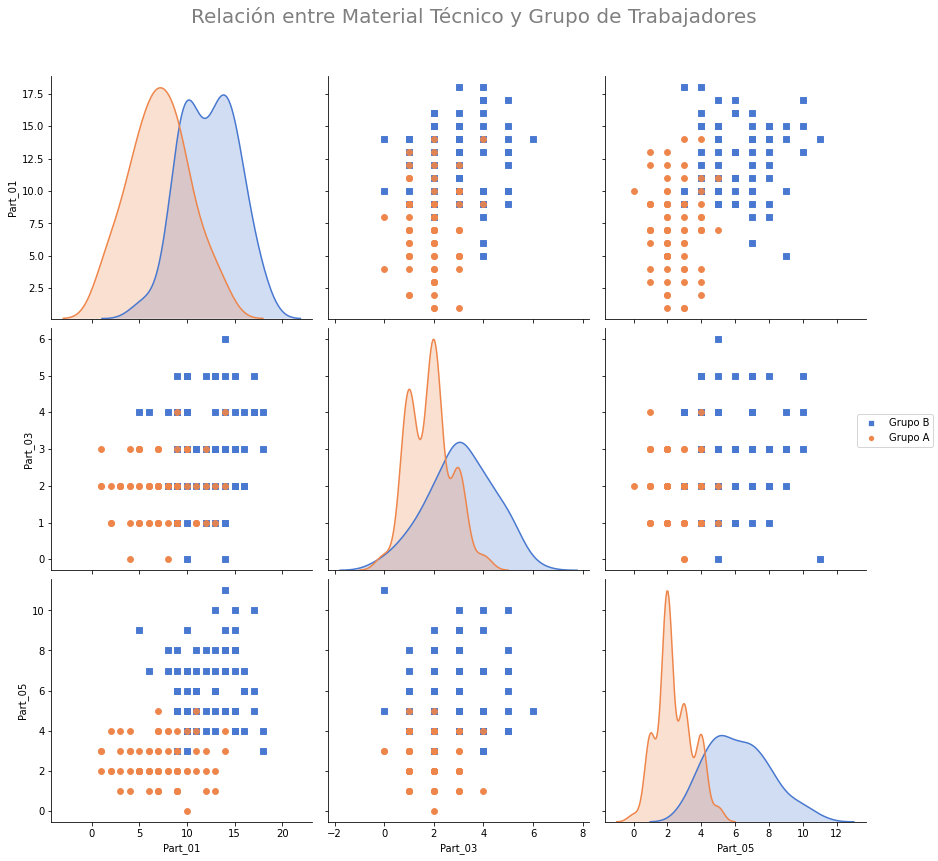

In [5]:
#Create a pairplot(plot across different attributes)
a=sns.pairplot(MTBF_Data ,hue='Work Shift' ,palette="muted",height=4,vars=Parts[1:4],kind='scatter',markers=['s','o'])

#Change the size of scatterpoints
a=a.map_offdiag(plt.scatter,s=35,alpha=0.9)

#Remove the top and the right lines
sns.despine()

#Additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9)

#Set the title of the graph
a.fig.suptitle('Relación entre Material Técnico y Grupo de Trabajadores',fontsize=20,color='black',alpha=0.5)
a._legend.remove()
a.fig.legend(['Grupo B', 'Grupo A'], loc='center right')

### OTHER PAIRWISE RELATIONSHIPS REPRESENTATION

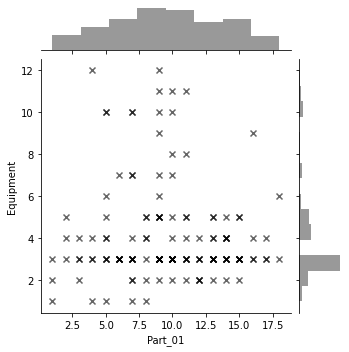

In [6]:
b=sns.jointplot(x='Part_01', y='Equipment', data=MTBF_Data, height=5, alpha=.6,color='k', marker='x')

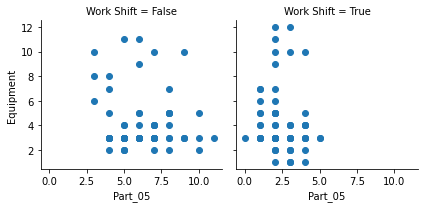

In [7]:
c=sns.FacetGrid(MTBF_Data, col='Work Shift')
c.map(plt.scatter,'Part_05','Equipment', cmap = 'R')

### T-TEST 

**Hypothesis:** There is a difference in consumption of technical material between the works shifts
Test:
* Make T-test between works shifts for Part 05

In [8]:
team_A = MTBF_Data[MTBF_Data['Work Shift'] == True]
team_B = MTBF_Data[MTBF_Data['Work Shift'] == False]

In [9]:
from scipy.stats import ttest_ind

t, p = ttest_ind(team_A['Part_05'], team_B['Part_05'])
different = True if p < 0.01 else False

In [10]:
different, t, p

(True, -15.276452586689947, 7.508187719252198e-32)

In [11]:
labels = ['Part 01', 'Part 03', 'Part 05', 'Part 06', 'Part 10', 'Part 12']
bars_A = list(team_A.iloc[:, 3:].sum())
bars_B = list(team_B.iloc[:, 3:].sum())

In [12]:
bars_A

[535.0, 139.0, 182.0, 197.0, 547.0, 187.0]

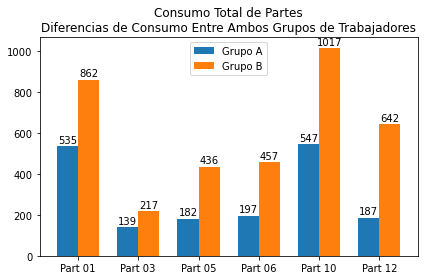

In [13]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bars_A, width, label='Grupo A')
rects2 = ax.bar(x + width/2, bars_B, width, label='Grupo B')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title("Consumo Total de Partes\nDiferencias de Consumo Entre Ambos Grupos de Trabajadores")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper center')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### CASE I:

* We choose the work shift that has the lowest consumption and double it
* We make a plot with results
* Finally calculate the mean beteween results

In [14]:
double_team_A = team_A.copy()
double_team_A['Dates'] = pd.to_datetime(team_A['Dates'])

In [15]:
double_team_A = double_team_A.resample('MS', on='Dates').sum()*2
double_team_A = double_team_A.drop(columns=['Equipment', 'Work Shift'])
double_team_A .head(2)

,Part_01,Part_03,Part_05,Part_06,Part_10,Part_12
Dates,,,,,,
2019-01-01,116.0,40.0,32.0,36.0,112.0,44.0
2019-02-01,58.0,26.0,28.0,34.0,74.0,36.0


#### PLOT WHITH RESULTS

In [16]:
ERP_data['Dates'] = pd.to_datetime(ERP_data['Dates'])
ERP_data = ERP_data.set_index('Dates')
result = pd.concat([ERP_data, double_team_A], axis=1, sort=False)

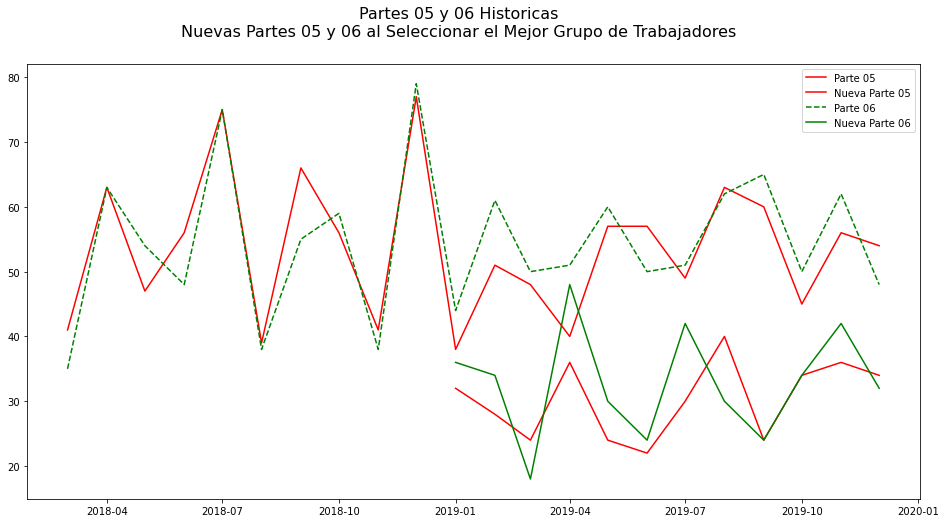

In [32]:
plot_res = result.iloc[21:, :]   #.plot(y=Parts[3:5], figsize=(10,5), label=False)
plt.rcParams['figure.figsize'] = (16, 8)

fig, ax = plt.subplots()
plt.suptitle("Partes 05 y 06 Historicas\nNuevas Partes 05 y 06 al Seleccionar el Mejor Grupo de Trabajadores", fontsize=16)
ax.plot(plot_res.iloc[:,2], 'k-', color='red', label='Parte 05')
ax.plot(plot_res.iloc[:,8], 'k-', color='red', label='Nueva Parte 05')
ax.plot(plot_res.iloc[:,3], 'k--', color= 'green', label='Parte 06')
ax.plot(plot_res.iloc[:,9], 'k-', color= 'green', label='Nueva Parte 06')

ax.legend()
plt.show()

In [18]:
labels = ['Part 01', 'Part 03', 'Part 05', 'Part 06', 'Part 10', 'Part 12']
old_result = list(ERP_data.iloc[31:, :].sum())
new_result = list(double_team_A.sum())

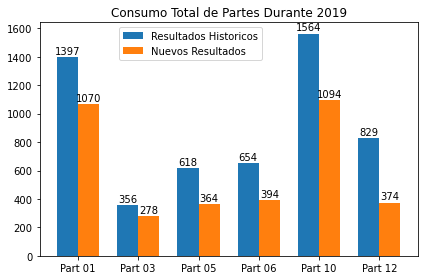

In [19]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, old_result, width, label='Resultados Historicos')
rects2 = ax.bar(x + width/2, new_result, width, label='Nuevos Resultados')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Consumo Total de Partes Durante 2019')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper center', bbox_to_anchor=(0.4, 1))


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#### THE MEAN DIFFERENCE IN PERCENTAGE

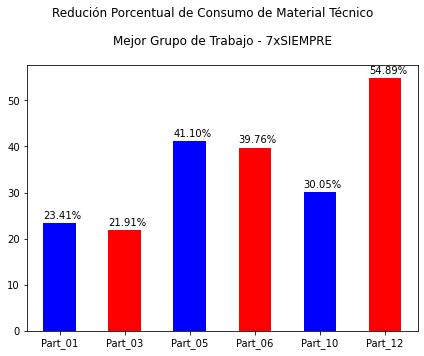

In [20]:
from decimal import Decimal
fraction_diff = double_team_A.sum() / ERP_data.iloc[31:, :].sum()
mean_parts = (1 - fraction_diff)*100

ax = mean_parts.plot.bar(color=['blue','red'], rot=0, figsize=(6,5))
ax.set_title('Mejor Grupo de Trabajo - 7xSIEMPRE\n', y=1.)
plt.suptitle('Redución Porcentual de Consumo de Material Técnico')
for p in ax.patches:
    ax.annotate('{0:.2f}%'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()+1))
plt.tight_layout()

plt.show()

### FORECASTING CONSUMPTION REV02

* Forecasting plot
* Train and Loss Validation

In [21]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('ERP_Dataset.csv', usecols=[3], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = round(len(dataset) * 0.85)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(trainX, trainY, validation_split=0.4, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

Using TensorFlow backend.
C:\Users\Joel\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Joel\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Joel\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Joel\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519


Train on 21 samples, validate on 14 samples
Epoch 1/100
 - 0s - loss: 0.2732 - val_loss: 0.2766
Epoch 2/100
 - 0s - loss: 0.2410 - val_loss: 0.2498
Epoch 3/100
 - 0s - loss: 0.2142 - val_loss: 0.2238
Epoch 4/100
 - 0s - loss: 0.1893 - val_loss: 0.2014
Epoch 5/100
 - 0s - loss: 0.1673 - val_loss: 0.1817
Epoch 6/100
 - 0s - loss: 0.1473 - val_loss: 0.1658
Epoch 7/100
 - 0s - loss: 0.1306 - val_loss: 0.1521
Epoch 8/100
 - 0s - loss: 0.1164 - val_loss: 0.1396
Epoch 9/100
 - 0s - loss: 0.1042 - val_loss: 0.1298
Epoch 10/100
 - 0s - loss: 0.0943 - val_loss: 0.1215
Epoch 11/100
 - 0s - loss: 0.0864 - val_loss: 0.1153
Epoch 12/100
 - 0s - loss: 0.0808 - val_loss: 0.1101
Epoch 13/100
 - 0s - loss: 0.0759 - val_loss: 0.1068
Epoch 14/100
 - 0s - loss: 0.0726 - val_loss: 0.1045
Epoch 15/100
 - 0s - loss: 0.0704 - val_loss: 0.1025
Epoch 16/100
 - 0s - loss: 0.0685 - val_loss: 0.1013
Epoch 17/100
 - 0s - loss: 0.0676 - val_loss: 0.1001
Epoch 18/100
 - 0s - loss: 0.0665 - val_loss: 0.0992
Epoch 19/1

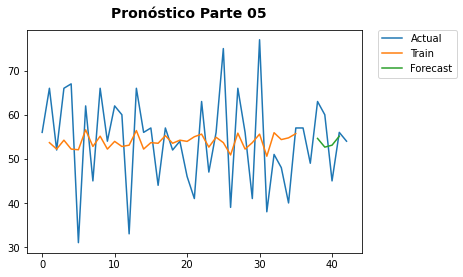

In [22]:
# plot baseline and predictions

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.90)

fig.suptitle('Pronóstico Parte 05', fontsize=14, fontweight='bold')
#ax.set_title('Part 01')


plt.plot(scaler.inverse_transform(dataset), label="Actual")
plt.plot(trainPredictPlot, label="Train")
plt.plot(testPredictPlot, label="Forecast")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

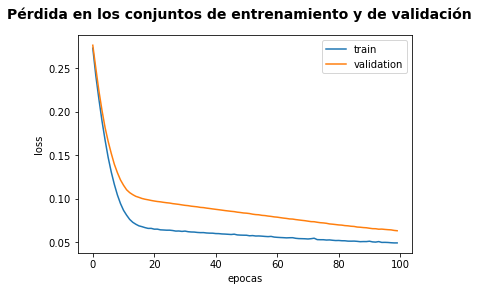

In [23]:
#plot train and validation
plt.suptitle('Pérdida en los conjuntos de entrenamiento y de validación', fontsize=14, fontweight='bold')

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('epocas')
plt.ylabel('loss')
plt.legend(('train', 'validation'))
plt.show()

### CASE STUDY:

* Best Group Choice
* Mirrow Group / replace with mean

In [24]:
best_ch = team_A.groupby('Equipment').mean().round(decimals=0).astype(int).copy()
best_ch = best_ch.filter(['Part_01', 'Part_03', 'Part_05', 'Part_06','Part_10','Part_12'])
best_ch = best_ch.reset_index()

In [25]:
best_team_B = team_B.copy()

In [26]:
mirrow_B = best_team_B.merge(best_ch, how='inner', on = 'Equipment', right_index=True)
mirrow_B = mirrow_B.filter(['Dates', 'Equipment', 'Work Shift', 'Part_01_y', 'Part_03_y', 'Part_05_y', 
             'Part_06_y', 'Part_10_y', 'Part_12_y'])
mirrow_B.columns = ['Dates', 'Equipment', 'Work Shift', 'Part_01', 'Part_03', 'Part_05', 'Part_06', 'Part_10', 'Part_12']

In [27]:
replace_A = team_A.copy()

In [28]:
new_data = pd.concat([best_team_B,replace_A])
new_data = new_data.sort_values(by=['Dates'])

Text(0.5, 1.0, 'Part 10, Part 12')

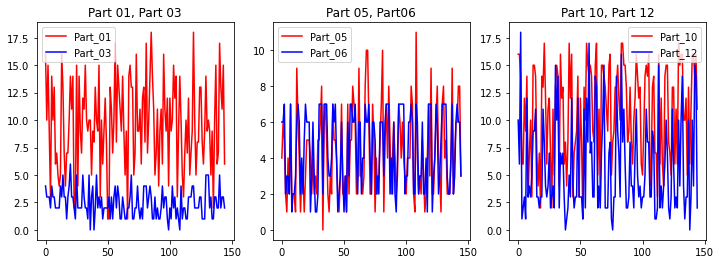

In [29]:
new_data = new_data.reset_index(drop=True)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
new_data.plot(y =Parts[1:3], ax=axes[0], color=['red', 'blue']); axes[0].set_title('Part 01, Part 03')
new_data.plot(y =Parts[3:5], ax=axes[1], color=['red', 'blue']); axes[1].set_title('Part 05, Part06')
new_data.plot(y =Parts[5:7], ax=axes[2], color=['red', 'blue']); axes[2].set_title('Part 10, Part 12')

In [30]:
new_data['Dates'] = pd.to_datetime(team_A['Dates'])
new_data= new_data.resample('MS', on='Dates').sum()
new_data = new_data.drop(columns=['Equipment', 'Work Shift'])

<AxesSubplot:xlabel='Dates'>

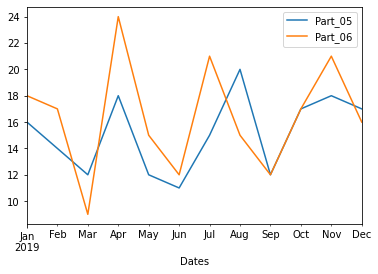

In [31]:
new_data.plot(y=Parts[3:5])